<a href="https://colab.research.google.com/github/SevenDogsNTwoCats/CreacionDeModelosML/blob/main/EjercicosML_NoteboockGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación modelos de Aprendizaje Automático (Machine Learning)
@autor: alhanis.espinal@outlook.com @date: 2024/07/23

A continuación se aborda dos ejemplos práctico de creación de modelos de aprendizaje automático con Tensorflow y Skealearn usando los datasets de la base de datos MNIST y California Housing que proporciona Google Colab.

En estos ejemplos se intenta abordar los puntos claves para crear un modelo de ML, en estos ejemplos en concreto se craera un modelo de aprendizaje supervizado de regresión con los datasets de California Housing donde el modelo predecira el precio de casas en California, y con los datos de la base de datos MNIST se creara un modelo de clasificación multiclase donde el modelo aprendera a diferenciar imagener de números del 0 al 9 escritos a mano.

## Explicación rapida sobre los modelos de Machine Learning

"La Inteligencia Artificial (IA) es la parte de las ciencias
de la computación relacionada con el diseño sistemas
informáticos inteligentes, es decir, sistemas que
exhiben características que asociamos con
inteligencia en el comportamiento humano:
comprensión del lenguaje, aprendizaje,
razonamiento, resolver problemas, y así
sucesivamente ". (Barr y Feigenbaum, 1981)

El Machine Leaning (ML) es una de las áreas de la intligencia artificial, esta área busca estudiar y crear algoritmos que aprenden mediante la experiencia. Según (Mitchell, 1997) Un programa de computadora "aprende" de la
experiencia E con respecto a alguna clase de tareas T
y la medida de desempeño P si su desempeño en
tareas en T, medido por P, mejora con la experiencia
E.

### Tipos de aprendizaje automático

#### Aprendizaje Supervisado (con etiquetas [valor de salida o respuesta correcta])
- Clasificación (etiquetas discretas)
  - Binaria (de dos etiquetas se selecciona una).
  - Multiclase (de varias etiquetas se selecciona una).
  - Multietiqueta (de varias etiquetas se seleccionan varias).
- Regresión (etiquetas continuas)

#### Aprendizaje No Supervisado (sin etiquetas)
- Agrupamiento (Clustering), Ingeniería de atributos, etc.
- Aprendizaje Semisupervisado

## Redes neuronales

La inteligencias artificiales estan compuestas por redes neuronales y estas a su vez por unidades llamadas neuronas o nodos. Cada neurona recibe una o más entradas, las procesa a través de una función de activación y produce una salida. Una neurona artificial se puede representar matemáticamente de la siguiente manera:

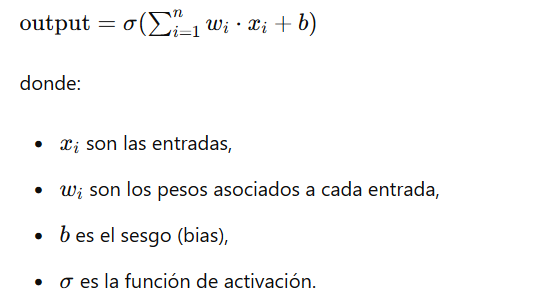

Al conjunto x de entrada se le conoce como "atributos" y son las caracteristicas de nuestras entidades de estudio, al conjunto de salida se le conoce como "etiquetas" y son las salidas o respuestas a nuestras entidades, y al conjunto de w y b se le conoce como "parámetros", estos parametros son los valores que buscamos al entrenar nuestros modelos de ML.

## Resumen

En resumen, una red neuronal es un modelo matematico que mediante funciones matemáticas busca encontrar una serie de valores llamados parámetros que al multiplicarse y sumarse con los atributos de nuestro objeto de estudio darán como salida las respuestas o "etiquetas" para estos objetos.

## California Housing Data

El archivo de California Housing que Google Colab pone a disposición es un conjunto de datos popular que se utiliza para problemas de regresión. Este conjunto de datos contiene información sobre viviendas en California y se utiliza para predecir el valor de las viviendas basándose en características como la ubicación, el tamaño y el número de habitaciones.

### Contenido del Conjunto de Datos

Generalmente, el conjunto de datos de California Housing contiene las siguientes características:

    longitude: Longitud de la vivienda.
    latitude: Latitud de la vivienda.
    housing_median_age: Edad media de las viviendas en la localidad.
    total_rooms: Número total de habitaciones.
    total_bedrooms: Número total de dormitorios.
    population: Número de habitantes en la localidad.
    households: Número de hogares en la localidad.
    median_income: Ingreso medio de los hogares.
    median_house_value: Valor mediano de las viviendas (variable objetivo en tareas de regresión).

Para entrenar crear nuestro modelo de ML lo haremos en 5 pasos:
1. Importación de librerias y carga de datos
2. Exploración de los datos
3. Creación del modelo
4. Entrenamiento del modelo
5. Evaluación del modelo

### Importación de librerias y carga de datos

In [ ]:
# Cargar los datos

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Leer los datos desde archivos CSV
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")


#### Importar las librerías necesarias
Se cargan las librerías para manipulación de datos, creación de gráficos y cálculos numéricos:

- `pandas`: para manipulación y análisis de datos.
- `matplotlib.pyplot`: para la creación de gráficos.
- `numpy`: para operaciones numéricas.
- `seaborn`: para la visualización de datos estadísticos.



### Exploración de los datos

In [ ]:
# Visualizar las primeras filas del DataFrame de entrenamiento
print(train.head())

# Obtener información general sobre el DataFrame
train.info()

# Contar valores faltantes en cada columna
train.isnull().sum()

# Obtener estadísticas descriptivas de las columnas numéricas
train.describe()

# Visualizar la distribución de la variable 'median_house_value'
sns.displot(train['median_house_value'])

# Visualizar la relación entre 'median_income' y 'median_house_value'
var = 'median_income'
data = pd.concat([train['median_house_value'], train[var]], axis=1)
data.plot.scatter(x=var, y='median_house_value', ylim=(0,600000), s=32)

# Visualizar la relación entre 'housing_median_age' y 'median_house_value' usando un gráfico de caja
var = 'housing_median_age'
data = pd.concat([train['median_house_value'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=var, y="median_house_value", data=data)
fig.axis(ymin=0, ymax=600000)

# Mostrar la matriz de correlación entre las variables del DataFrame
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# Visualizar la relación entre 'latitude' y 'longitude' usando un gráfico de dispersión
plt.figure(figsize=(10,10))
sns.jointplot(x=train.latitude.values, y=train.longitude.values, size=10)
plt.ylabel('longitude', fontsize=12)
plt.xlabel('latitude', fontsize=12)
plt.show()

# Ajustar el diseño del gráfico
sns.despine()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

#### Leer los datos
Se cargan los datos de entrenamiento y prueba desde archivos CSV:

- `train`: DataFrame que contiene los datos de entrenamiento.
- `test`: DataFrame que contiene los datos de prueba.

#### Visualizar las primeras filas del DataFrame
Muestra las primeras 5 filas del DataFrame de entrenamiento para obtener una vista previa de los datos.

#### Obtener información general sobre el DataFrame
Proporciona detalles sobre el DataFrame, como el número de entradas, tipos de datos y cantidad de datos no nulos.

#### Contar valores faltantes en cada columna
Identifica si hay valores faltantes en las columnas del DataFrame y cuenta su número.

#### Obtener estadísticas descriptivas
Muestra estadísticas básicas sobre las columnas numéricas del DataFrame, como la media, desviación estándar, valores mínimos y máximos.

#### Visualizar la distribución de una variable
Muestra cómo se distribuye una variable específica (`median_house_value`) usando un gráfico de distribución.

#### Visualizar la relación entre variables
- **Relación entre `median_income` y `median_house_value`**: Usa un gráfico de dispersión para examinar la relación entre estas dos variables.
- **Relación entre `housing_median_age` y `median_house_value`**: Usa un gráfico de caja para observar cómo la edad media de las viviendas se relaciona con el valor de la vivienda.

#### Mostrar la matriz de correlación
Muestra cómo las variables están correlacionadas entre sí mediante una matriz de correlación, donde se puede ver la fuerza y la dirección de las relaciones.

#### Visualizar la relación entre coordenadas geográficas
Crea un gráfico de dispersión para mostrar la relación entre latitud y longitud en los datos, ayudando a visualizar la distribución geográfica.

#### Ajustar el diseño del gráfico
Mejora la apariencia de los gráficos eliminando bordes innecesarios y realizando ajustes adicionales para una presentación más clara.


### Procesamiento de datos

In [ ]:
### Definir X y valores

# `y` contiene los valores de la variable objetivo, en este caso 'median_house_value', extraídos del conjunto de datos.
# `X` contiene todas las características del conjunto de datos, excluyendo la variable objetivo.
y = train.median_house_value.values
X = train.drop(['median_house_value'], axis=1)

### Estandarizar características

# Importa StandardScaler de sklearn para estandarizar las características.
# La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a los datos y transforma las características para que estén en la misma escala. (normalizando)
X = scaler.fit_transform(X)

### Dividir los datos en conjuntos de entrenamiento y validación

# Importa train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba.
# Esta división permite entrenar el modelo en una parte de los datos y evaluarlo en una parte separada.
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime la forma de cada conjunto para verificar la división.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13600, 8) (3400, 8) (13600,) (3400,)


#### Definir `X` y valores

Separa la variable objetivo (`median_house_value`) de las características del conjunto de entrenamiento.

- `y`: Array que contiene los valores de la variable objetivo (`median_house_value`).
- `X`: DataFrame con todas las características del conjunto de entrenamiento, excluyendo la variable objetivo.

#### Estandarización de características

Se aplica la estandarización a las características utilizando `StandardScaler` de `sklearn`. La estandarización transforma las características para que tengan una media de 0 y una desviación estándar de 1, lo que puede mejorar el rendimiento de muchos algoritmos de machine learning.

- `scaler`: Instancia de `StandardScaler`.
- `X`: Array de características estandarizadas.

#### Dividir los datos en conjuntos de entrenamiento y validación

Se dividen las características y los valores en conjuntos de entrenamiento y prueba utilizando `train_test_split` de `sklearn`. Esto permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

- `X_train`: Conjunto de características para entrenamiento.
- `X_test`: Conjunto de características para validación.
- `y_train`: Valores de la variable objetivo para entrenamiento.
- `y_test`: Valores de la variable objetivo para validación.

También se muestra la forma de cada conjunto para verificar la división.

- `X_train.shape`: Forma del conjunto de entrenamiento para características.
- `X_test.shape`: Forma del conjunto de prueba para características.
- `y_train.shape`: Forma del conjunto de entrenamiento para la variable objetivo.
- `y_test.shape`: Forma del conjunto de prueba para la variable objetivo.


#### ¿Por qué normalizamos/estandarizamos los datos?

La normalización generalmente implica escalar las características para que tengan una media de 0 y una desviación estándar de 1. Es un paso importante en el preprocesamiento de datos para modelos de aprendizaje automático debido a las siguientes razones:

1. **Aceleración del Entrenamiento:**
   - **Convergencia más rápida:** Los modelos de aprendizaje automático, especialmente las redes neuronales, tienden a entrenarse más rápido y con mayor eficiencia cuando las características están en una escala similar. Esto se debe a que los algoritmos de optimización (como el descenso de gradiente) funcionan mejor cuando los datos están normalizados.

2. **Estabilidad Numérica:**
   - **Prevención de desbordamientos:** Las redes neuronales pueden ser sensibles a valores de entrada extremadamente grandes o pequeños, lo que puede llevar a problemas de desbordamiento o subdesbordamiento numérico. Normalizar los datos ayuda a mantener los valores en un rango manejable.

3. **Igual Importancia a las Características:**
   - **Evitar el sesgo:** Si las características tienen diferentes escalas, el modelo podría dar más importancia a las características con valores más grandes, lo que puede llevar a un sesgo no deseado. Normalizar las características asegura que todas tengan igual peso inicial.

4. **Mejor Rendimiento del Modelo:**
   - **Resultados más consistentes:** Muchos modelos de aprendizaje automático, como el k-NN y las redes neuronales, funcionan mejor cuando las características están normalizadas. Esto puede llevar a una mejora en la precisión y la consistencia del modelo.

5. **Requisitos de Algoritmos Específicos:**
   - **Algoritmos que requieren normalización:** Algunos algoritmos de aprendizaje automático, como los basados en distancia (por ejemplo, k-NN y SVM), requieren que los datos estén normalizados para funcionar correctamente, ya que calculan distancias entre puntos de datos.


### Creación del modelo

In [ ]:
### Definir el modelo

# Importa `enable_hist_gradient_boosting` para habilitar el HistGradientBoostingRegressor de sklearn.
# `HistGradientBoostingRegressor` es un modelo de regresión basado en el algoritmo de gradiente boosting histográfico,
# que es más eficiente en grandes conjuntos de datos y es menos sensible a la sobreajuste comparado con otros modelos.
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Importa las métricas para evaluar el rendimiento del modelo.
from sklearn.metrics import mean_squared_error, r2_score

# Crea una instancia del modelo `HistGradientBoostingRegressor` con los siguientes parámetros:
# - `max_iter`: número máximo de iteraciones para el algoritmo de boosting (3000 en este caso).
# - `random_state`: semilla para la generación de números aleatorios, asegurando reproducibilidad de los resultados.
model = HistGradientBoostingRegressor(max_iter=3000, random_state=1)




Este bloque de código configura un modelo de regresión utilizando `HistGradientBoostingRegressor` de `sklearn`. A continuación se detalla cada paso:

- **Importaciones necesarias:**
  - `enable_hist_gradient_boosting`:
    Habilita el uso del `HistGradientBoostingRegressor`, un modelo basado en el algoritmo de gradiente boosting histográfico. Este algoritmo es más eficiente en el manejo de grandes conjuntos de datos y puede ser menos susceptible al sobreajuste en comparación con otros modelos de boosting.

  - `HistGradientBoostingRegressor`:
    Modelo de regresión que utiliza el algoritmo de gradiente boosting histográfico, conocido por su eficiencia y capacidad para manejar grandes volúmenes de datos.

  - `mean_squared_error`, `r2_score`:
    Funciones para evaluar el rendimiento del modelo. `mean_squared_error` calcula el error cuadrático medio, y `r2_score` mide la proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes.

- **Creación del modelo:**
  - `HistGradientBoostingRegressor(max_iter=3000, random_state=1)`:
    - `max_iter=3000`: Define el número máximo de iteraciones para el proceso de boosting. Un número mayor puede mejorar la precisión, pero también puede aumentar el tiempo de entrenamiento.
    - `random_state=1`: Establece una semilla para la generación de números aleatorios, lo que asegura que los resultados sean reproducibles en ejecuciones posteriores del código.


### Entrenamiento del modelo



In [ ]:
### Entrenar el modelo y evaluar el rendimiento

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación del rendimiento en el conjunto de entrenamiento
print(model.score(X_train, y_train))



Este bloque de código entrena el modelo y evalúa su rendimiento en el conjunto de entrenamiento.

- **Entrenamiento del modelo:**
  - `model.fit(X_train, y_train)`:
    - Este método entrena el modelo utilizando los datos de entrenamiento `X_train` (características) y `y_train` (valores objetivos). El proceso de entrenamiento ajusta los parámetros del modelo para minimizar el error en el conjunto de datos de entrenamiento.

- **Evaluación del rendimiento:**
  - `print(model.score(X_train, y_train))`:
    - Este método calcula el coeficiente de determinación \( R^2 \) del modelo en el conjunto de datos de entrenamiento. El valor \( R^2 \) indica la proporción de la variación en la variable dependiente que es explicada por las variables independientes. Un valor cercano a 1.0 sugiere que el modelo explica bien la variación en los datos, mientras que un valor cercano a 0 indica un ajuste deficiente.



### Evaluación del modelo

0.8348147302129738
0.8348147302129738


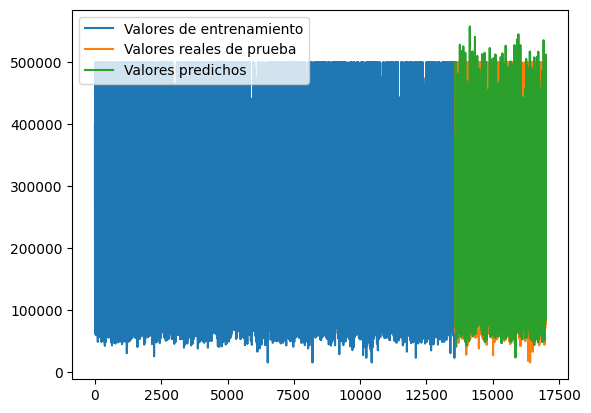

,actual_value,predicted
0,142700.0,143805.083558
1,500001.0,500462.024514
2,61800.0,72257.471559
3,162800.0,140484.571314
4,90600.0,95029.605343


In [ ]:
### Hacer predicciones y evaluar el rendimiento del modelo

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegurarse de que las predicciones no sean negativas (ajuste a 0 si es necesario)
y_pred[y_pred < 0] = 0

# Evaluar el rendimiento del modelo en el conjunto de prueba
print(model.score(X_test, y_test))  # Coeficiente de determinación R^2 en el conjunto de prueba
print(r2_score(y_test, y_pred))     # Coeficiente de determinación R^2 calculado manualmente

# Graficar los resultados de las predicciones frente a los resultados esperados
from matplotlib import pyplot as plt

plt.plot(y_train, label='Valores de entrenamiento')
plt.plot([None for _ in y_train] + [y for y in y_test], label='Valores reales de prueba')
plt.plot([None for _ in y_train] + [y for y in y_pred], label='Valores predichos')
plt.legend()
plt.show()

# Crear un DataFrame para comparar los valores reales y los predichos
df_val = pd.DataFrame({'actual_value': y_test, 'predicted': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val.head()


#### Hacer predicciones y evaluar el rendimiento del modelo

Este bloque de código realiza predicciones utilizando el modelo entrenado, evalúa su rendimiento en el conjunto de prueba, y visualiza los resultados.

- **Realizar predicciones:**
  - `y_pred = model.predict(X_test)`:
    - Este método genera predicciones para los datos de prueba `X_test` utilizando el modelo entrenado.

- **Ajustar predicciones negativas:**
  - `y_pred[y_pred < 0] = 0`:
    - Se asegura que las predicciones no sean negativas, estableciendo a 0 cualquier valor predicho que sea menor que 0.

- **Evaluar el rendimiento del modelo:**
  - `print(model.score(X_test, y_test))`:
    - Calcula el coeficiente de determinación \( R^2 \) del modelo en el conjunto de prueba, indicando qué proporción de la variación en los datos de prueba es explicada por el modelo.
  - `print(r2_score(y_test, y_pred))`:
    - Calcula el coeficiente de determinación \( R^2 \) de manera manual, utilizando los valores reales `y_test` y las predicciones `y_pred`.

- **Visualizar los resultados:**
  - Utiliza `matplotlib` para graficar los valores reales de entrenamiento, los valores reales de prueba, y las predicciones del modelo. Esto ayuda a comparar visualmente el ajuste del modelo.

- **Crear un DataFrame con los resultados:**
  - `df_val = pd.DataFrame({'actual_value': y_test, 'predicted': y_pred})`:
    - Crea un DataFrame para almacenar y comparar los valores reales de prueba y las predicciones del modelo.
  - `df_val.reset_index(drop=True, inplace=True)`:
    - Reinicia el índice del DataFrame para facilitar la visualización.
  - `df_val.head()`:
    - Muestra las primeras filas del DataFrame para una revisión rápida de los resultados.


# MNIST DATA
La base de datos MNIST (por sus siglas en inglés, Modified National Institute of Standards and Technology database) es una extensa colección de base de datos que se utiliza ampliamente para el entrenamiento de diversos sistemas de procesamiento de imágenes. También se emplea con frecuencia en el campo del aprendizaje automático para tareas de entrenamiento y prueba.

Esta base de datos fue creada mediante la combinación de muestras de los conjuntos de datos originales del Instituto Nacional de Estándares y Tecnología (National Institute of Standards and Technology o NIST, en inglés). Los creadores tomaron esta decisión considerando que el conjunto de entrenamiento del NIST provenía de empleados de la Oficina del Censo estadounidense, mientras que el conjunto de prueba se obtenía de estudiantes de secundaria estadounidenses, lo que no era adecuado para experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para ajustarse a un cuadro delimitador de 28x28 píxeles y se suavizaron, lo que introdujo niveles de escala de grises.

## Importar libreias y mostrar datos






In [ ]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar datos del conjunto MNIST
mnist_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")

# Mostrar las primeras filas del DataFrame para inspección inicial
mnist_train.head()


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Este bloque de código realiza las siguientes acciones:

- **Importar librerías necesarias:**
  - `import tensorflow as tf`:
    - Importa TensorFlow, una biblioteca de código abierto para el aprendizaje automático y la inteligencia artificial.
  - `from tensorflow import keras`:
    - Importa Keras desde TensorFlow, una API de alto nivel para construir y entrenar modelos de aprendizaje profundo.
  - `import numpy as np`:
    - Importa NumPy, una biblioteca para la manipulación de arreglos y matrices en Python.
  - `import matplotlib.pyplot as plt`:
    - Importa Matplotlib, una biblioteca para crear gráficos y visualizaciones en Python.
  - `import pandas as pd`:
    - Importa Pandas, una biblioteca para el análisis y la manipulación de datos en estructuras tabulares.

- **Importar datos del conjunto MNIST:**
  - `mnist_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")`:
    - Lee un archivo CSV que contiene un subconjunto del conjunto de datos MNIST (imágenes de dígitos escritos a mano) y lo carga en un DataFrame de Pandas.

- **Mostrar las primeras filas del DataFrame:**
  - `mnist_train.head()`:
    - Muestra las primeras filas del DataFrame `mnist_train` para una revisión inicial de los datos cargados.


## Explorar los datos

In [ ]:
# Imprimir información sobre el DataFrame `mnist_train`

# Mostrar las dimensiones del DataFrame (número de filas y columnas)
print(mnist_train.shape)

# Mostrar un resumen del DataFrame, incluyendo el tipo de datos y la cantidad de valores no nulos por columna
print(mnist_train.info())

# Verificar la cantidad de valores nulos en cada columna del DataFrame
print(mnist_train.isnull().sum())

# Mostrar los nombres de las columnas del DataFrame
print(mnist_train.columns)

# Mostrar estadísticas descriptivas para las columnas numéricas del DataFrame
print(mnist_train.describe())

# Mostrar las primeras filas del DataFrame para inspección inicial
print(mnist_train.head())


(19999, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB
None
6        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.586    0
0.587    0
0.588    0
0.589    0
0.590    0
Length: 785, dtype: int64
Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)
                  6        0      0.1      0.2      0.3      0.4      0.5  \
count  19999.000000  19999.0  19999.0  19999.0  19999.0  19999.0  19999.0   
mean       4.470124      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.892807      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   

#### Inspección del DataFrame `mnist_train`

Este bloque de código realiza varias inspecciones y análisis del DataFrame `mnist_train`:

- **Mostrar las dimensiones del DataFrame:**
  - `print(mnist_train.shape)`:
    - Muestra las dimensiones del DataFrame, es decir, el número de filas y columnas. Esto ayuda a entender el tamaño del conjunto de datos.

- **Mostrar un resumen del DataFrame:**
  - `print(mnist_train.info())`:
    - Proporciona un resumen del DataFrame que incluye el tipo de datos de cada columna y la cantidad de valores no nulos en cada columna. Esto es útil para identificar problemas con los tipos de datos y valores faltantes.

- **Verificar la cantidad de valores nulos:**
  - `print(mnist_train.isnull().sum())`:
    - Muestra el número de valores nulos en cada columna. Esto ayuda a identificar columnas con datos faltantes que podrían necesitar limpieza o imputación.

- **Mostrar los nombres de las columnas:**
  - `print(mnist_train.columns)`:
    - Lista los nombres de las columnas en el DataFrame, proporcionando una vista rápida de los atributos disponibles en el conjunto de datos.

- **Mostrar estadísticas descriptivas:**
  - `print(mnist_train.describe())`:
    - Proporciona estadísticas descriptivas para las columnas numéricas del DataFrame, como la media, desviación estándar, valores mínimos y máximos. Esto ayuda a comprender la distribución de los datos numéricos.

- **Mostrar las primeras filas del DataFrame:**
  - `print(mnist_train.head())`:
    - Muestra las primeras filas del DataFrame para una revisión inicial de los datos cargados, permitiendo una inspección rápida del contenido del conjunto de datos.


## Procesamiento de datos

In [ ]:
# Preparar los datos para el entrenamiento

# Separar las características (features) de las etiquetas (labels)
x_train = mnist_train.drop(['6'], axis=1)  # Eliminar la columna '6' para obtener las características
y_train = mnist_train['6']  # Asignar la columna '6' como las etiquetas de entrenamiento

# Imprimir las dimensiones de las características y las etiquetas
print(x_train.shape)  # Muestra las dimensiones de las características (número de filas y columnas)
print(y_train.shape)  # Muestra las dimensiones de las etiquetas (número de filas)


(19999, 784)
(19999,)


#### Preparación de los Datos para el Entrenamiento

Este bloque de código se encarga de preparar los datos para el entrenamiento del modelo:

- **Separar las características de las etiquetas:**
  - `x_train = mnist_train.drop(['6'], axis=1)`:
    - Se eliminan las columnas que no forman parte de las características del modelo. En este caso, se elimina la columna con la etiqueta '6' para obtener solo las características del conjunto de datos.

  - `y_train = mnist_train['6']`:
    - Se asigna la columna con la etiqueta '6' como las etiquetas de entrenamiento. Esto corresponde a la variable objetivo que el modelo debe predecir.

- **Imprimir las dimensiones:**
  - `print(x_train.shape)`:
    - Muestra las dimensiones de las características `x_train`, que incluyen el número de muestras y el número de características. Esto ayuda a verificar que los datos se han preparado correctamente.
    
  - `print(y_train.shape)`:
    - Muestra las dimensiones de las etiquetas `y_train`, que incluyen el número de muestras. Esto ayuda a verificar que las etiquetas coinciden con las características en tamaño y alineación.


#### Normalizar las imagenes

In [ ]:
# Normalizar los datos de entrenamiento
x_train = x_train / 255.0  # Escalar los valores de los píxeles a un rango de 0 a 1




En este bloque de código se realiza la normalización de los datos de entrenamiento:

- **Escalar los valores de los píxeles:**
  - `x_train = x_train / 255.0`:
    - Los valores de los píxeles en las imágenes se escalan a un rango de 0 a 1 dividiendo por 255. Esto es necesario porque los valores de píxeles en imágenes suelen estar en el rango de 0 a 255, y normalizarlos facilita el entrenamiento del modelo al asegurar que todos los valores estén en un rango más manejable.


### One Hot Encoding

In [ ]:
# Convertir las etiquetas a formato one-hot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
print(y_train.shape)

(19999, 10)


#### Conversión de Etiquetas a Formato One-Hot

En este bloque de código se convierte el vector de etiquetas en una representación de formato one-hot:

- **Conversión a One-Hot Encoding:**
  - `y_train = keras.utils.to_categorical(y_train, num_classes=10)`:
    - La función `to_categorical` de Keras se utiliza para convertir las etiquetas de clase (que son enteros) en vectores binarios one-hot.
    - En este caso, se especifica `num_classes=10` para indicar que hay 10 clases diferentes (del 0 al 9).
    - Esto es necesario para problemas de clasificación en redes neuronales, ya que el formato one-hot es más adecuado para el cálculo de la pérdida y la predicción de clases en tareas de clasificación multiclase.

- **Impresión de la Forma de `y_train`:**
  - `print(y_train.shape)`:
    - Muestra la forma del array `y_train` después de la conversión, que debe ser `(n_samples, 10)`, donde `n_samples` es el número de muestras en el conjunto de entrenamiento.

  #### ¿Qué es One Hot Encoding?

  El método de codificación Label Encoding es una forma sencilla de asignar valores numéricos a las diferentes categorías de una variable categórica.

  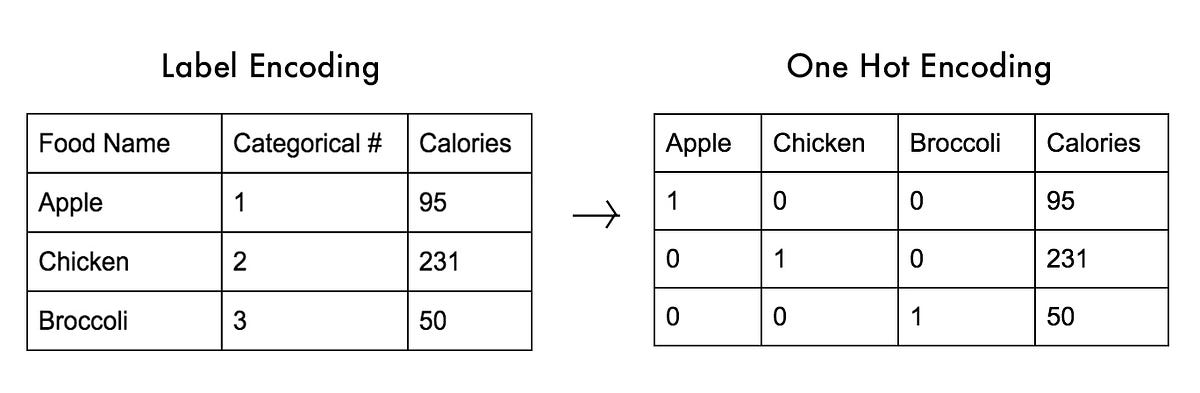


## Crear un modelo

In [ ]:
# Definir el modelo de red neuronal
model = keras.Sequential([
    # Primera capa oculta con 1000 neuronas y función de activación ReLU
    keras.layers.Dense(1000, activation='relu', input_shape=(784,)),

    # Segunda capa oculta con 500 neuronas y función de activación ReLU
    keras.layers.Dense(500, activation='relu'),

    # Capa de salida con 10 neuronas (una para cada clase) y función de activación Softmax
    keras.layers.Dense(10, activation='softmax')
])


#### Definición del Modelo de Red Neuronal

En este bloque de código se define un modelo de red neuronal utilizando el API Sequential de Keras:

- **Primera Capa Oculta:**
  - `keras.layers.Dense(1000, activation='relu', input_shape=(784,))`:
    - `Dense(1000)` crea una capa densa con 1000 neuronas.
    - `activation='relu'` utiliza la función de activación ReLU (Rectified Linear Unit) para introducir no linealidades en la red.
    - `input_shape=(784,)` especifica la forma de la entrada, que es un vector de 784 características (por ejemplo, imágenes de 28x28 píxeles aplanadas).

- **Segunda Capa Oculta:**
  - `keras.layers.Dense(500, activation='relu')`:
    - `Dense(500)` crea una capa densa con 500 neuronas.
    - `activation='relu'` aplica la función de activación ReLU.

- **Capa de Salida:**
  - `keras.layers.Dense(10, activation='softmax')`:
    - `Dense(10)` crea una capa densa con 10 neuronas, una por cada clase de salida (en un problema de clasificación de 10 clases).
    - `activation='softmax'` utiliza la función de activación Softmax para convertir las salidas en probabilidades de clase, sumando a 1.

Este modelo está diseñado para tareas de clasificación en las que la salida debe representar las probabilidades de pertenencia a cada una de las 10 clases posibles.


### compilar el modelo

In [ ]:
# Compilar el modelo
model.compile(
    # Optimizador Adam
    optimizer='adam',

    # Función de pérdida para clasificación categórica
    loss='categorical_crossentropy',

    # Métrica a evaluar durante el entrenamiento
    metrics=['accuracy']
)



En este bloque de código, se compila el modelo de red neuronal con los siguientes parámetros:

- **Optimizador:**
  - `optimizer='adam'`: El optimizador Adam se utiliza para ajustar los pesos de la red neuronal. Adam es un optimizador eficiente y ampliamente utilizado que adapta el aprendizaje de manera adaptativa para cada parámetro.

- **Función de Pérdida:**
  - `loss='categorical_crossentropy'`: La función de pérdida `categorical_crossentropy` se utiliza para problemas de clasificación múltiple donde las etiquetas son vectores codificados en un formato one-hot. Mide la diferencia entre las distribuciones de probabilidad predicha por el modelo y las etiquetas verdaderas.

- **Métrica:**
  - `metrics=['accuracy']`: La métrica `accuracy` se evalúa durante el entrenamiento y la prueba. Mide el porcentaje de clasificaciones correctas entre las predicciones realizadas por el modelo y las etiquetas verdaderas.

Esta configuración es adecuada para problemas de clasificación en los que el objetivo es minimizar la entropía cruzada categórica y maximizar la precisión del modelo.


## Entrenar el modelo

In [ ]:
# Entrenamiento del modelo
model.fit(
    # Datos de entrada para el entrenamiento
    x_train,

    # Etiquetas correspondientes a los datos de entrada
    y_train,

    # Número de épocas para el entrenamiento
    epochs=10,

    # Fracción de los datos para validación durante el entrenamiento
    validation_split=0.05
)


Epoch 1/10
594/594 [==============================] - 3s 4ms/step - loss: 0.2803 - accuracy: 0.9160 - val_loss: 0.1647 - val_accuracy: 0.9410
Epoch 2/10
594/594 [==============================] - 2s 3ms/step - loss: 0.1084 - accuracy: 0.9654 - val_loss: 0.1457 - val_accuracy: 0.9570
Epoch 3/10
594/594 [==============================] - 2s 3ms/step - loss: 0.0734 - accuracy: 0.9759 - val_loss: 0.1304 - val_accuracy: 0.9610
Epoch 4/10
594/594 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.1331 - val_accuracy: 0.9630
Epoch 5/10
594/594 [==============================] - 3s 4ms/step - loss: 0.0466 - accuracy: 0.9834 - val_loss: 0.1224 - val_accuracy: 0.9590
Epoch 6/10
594/594 [==============================] - 2s 3ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 7/10
594/594 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.1690 - val_accuracy: 0.9670
Epoch 


En este bloque de código, se entrena el modelo de red neuronal con los siguientes parámetros:

- **Datos de Entrada:**
  - `x_train`: Conjunto de datos de entrada para el entrenamiento del modelo. Estos datos han sido normalizados para que sus valores estén en el rango de [0, 1].

- **Etiquetas:**
  - `y_train`: Etiquetas correspondientes a los datos de entrada `x_train`. Estas etiquetas han sido codificadas en formato one-hot para problemas de clasificación múltiple.

- **Número de Épocas:**
  - `epochs=10`: Número total de épocas durante el entrenamiento. Una época es una iteración completa sobre el conjunto de entrenamiento. En este caso, el modelo se entrenará durante 10 épocas. (iteraciones)

- **Fracción de Datos para Validación:**
  - `validation_split=0.05`: Proporción de los datos de entrenamiento a reservar para la validación del modelo durante el entrenamiento. En este caso, el 5% de los datos de entrenamiento se utilizarán para validar el rendimiento del modelo en cada época.

Durante el entrenamiento, el modelo ajusta sus pesos para minimizar la función de pérdida `categorical_crossentropy` y maximizar la métrica `accuracy`, mientras evalúa su rendimiento en el conjunto de validación especificado.


## Evaluar el modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(x_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

# Cargar datos de prueba
mnist_test = pd.read_csv("/content/sample_data/mnist_test.csv")

# Procesar y normalizar los datos de prueba
x_test = mnist_test.drop(['7'], axis=1)  # Eliminar la columna de etiquetas
y_test = mnist_test['7']  # Extraer las etiquetas

# Normalizar los datos
x_test = x_test / 255.0

# Codificación one-hot para las etiquetas de prueba
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


625/625 [==============================] - 4s 6ms/step - loss: 0.0268 - accuracy: 0.9923
Train loss: 0.02678965963423252
Train accuracy: 0.9922996163368225
313/313 [==============================] - 2s 5ms/step - loss: 0.1549 - accuracy: 0.9668
Test loss: 0.15487730503082275
Test accuracy: 0.9667966961860657



En este bloque de código, se evalúa el modelo en los conjuntos de datos de entrenamiento y prueba para obtener la pérdida y la precisión.

#### Evaluación en el Conjunto de Entrenamiento

1. **Evaluar el Modelo:**
   - `model.evaluate(x_train, y_train)`: Evalúa el rendimiento del modelo en el conjunto de entrenamiento.
   - `loss`: Pérdida calculada en el conjunto de entrenamiento.
   - `accuracy`: Precisión del modelo en el conjunto de entrenamiento.
   - Se imprimen los resultados de pérdida y precisión.

#### Evaluación en el Conjunto de Prueba

1. **Cargar Datos de Prueba:**
   - `mnist_test = pd.read_csv("/content/sample_data/mnist_test.csv")`: Carga el conjunto de datos de prueba desde un archivo CSV.

2. **Procesar y Normalizar Datos de Prueba:**
   - `x_test = mnist_test.drop(['7'], axis=1)`: Elimina la columna de etiquetas (en este caso, '7') del conjunto de datos de prueba.
   - `y_test = mnist_test['7']`: Extrae las etiquetas del conjunto de datos de prueba.
   - `x_test = x_test / 255.0`: Normaliza los datos de entrada dividiendo por 255 para que los valores estén en el rango [0, 1].

3. **Codificación One-Hot para Etiquetas de Prueba:**
   - `y_test = keras.utils.to_categorical(y_test, num_classes=10)`: Convierte las etiquetas en formato one-hot encoding para problemas de clasificación múltiple.

4. **Evaluar el Modelo:**
   - `model.evaluate(x_test, y_test)`: Evalúa el rendimiento del modelo en el conjunto de prueba.
   - `loss`: Pérdida calculada en el conjunto de prueba.
   - `accuracy`: Precisión del modelo en el conjunto de prueba.
   - Se imprimen los resultados de pérdida y precisión.


## Visualizar algunas predicciones

313/313 [==============================] - 1s 2ms/step
<class 'pandas.core.frame.DataFrame'>


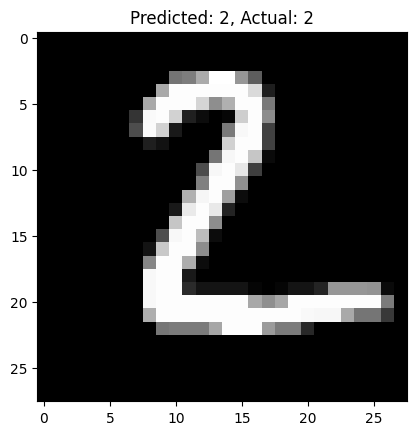

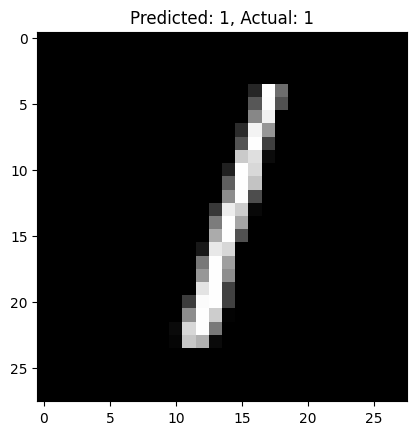

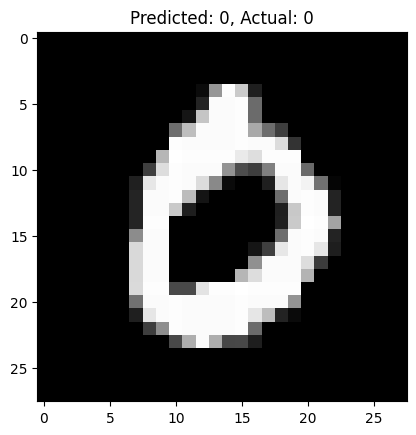

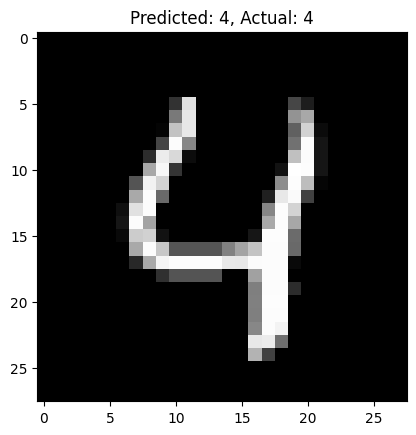

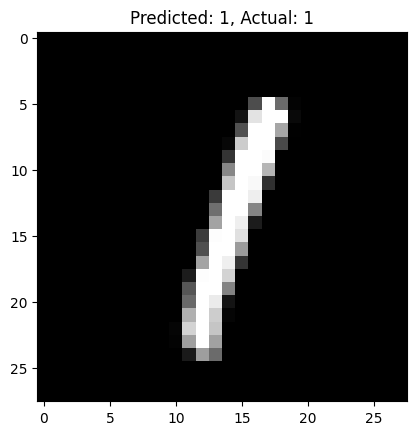

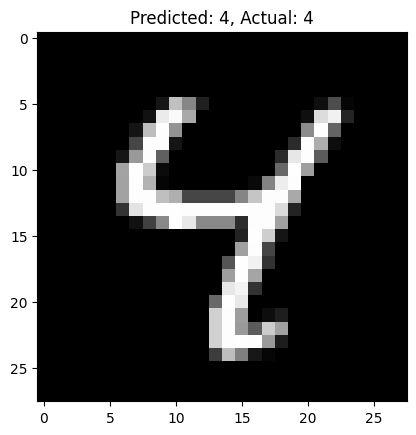

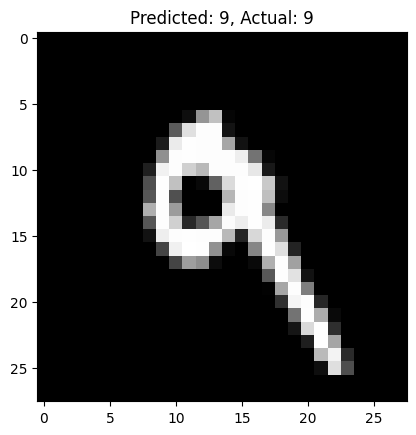

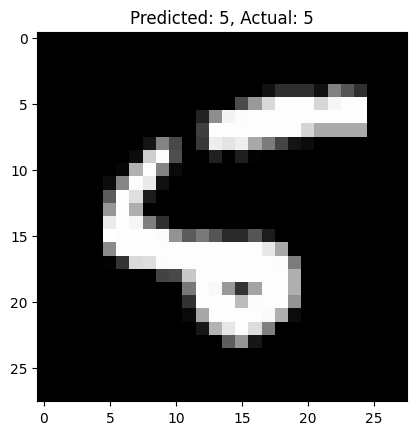

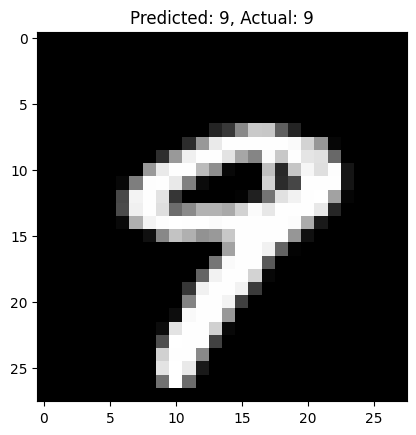

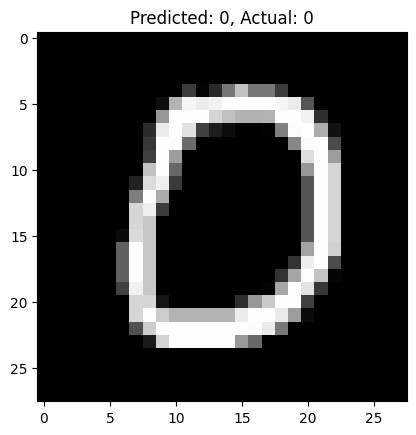

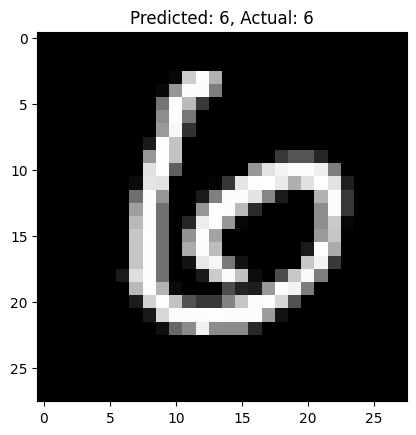

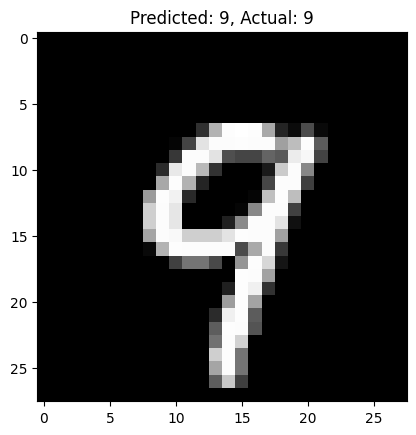

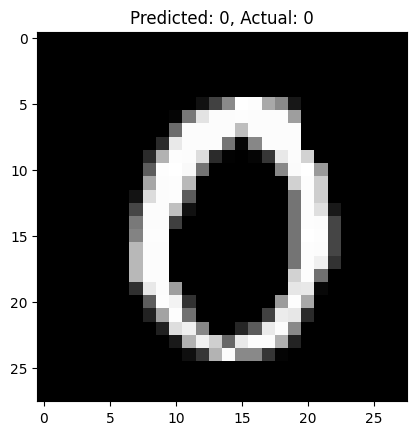

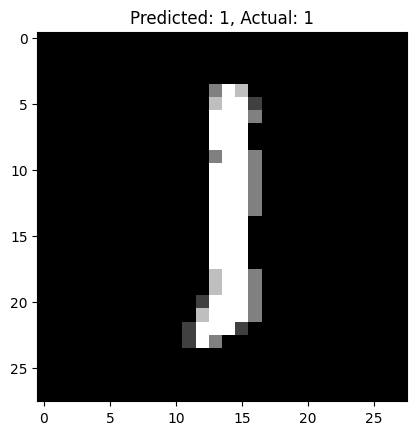

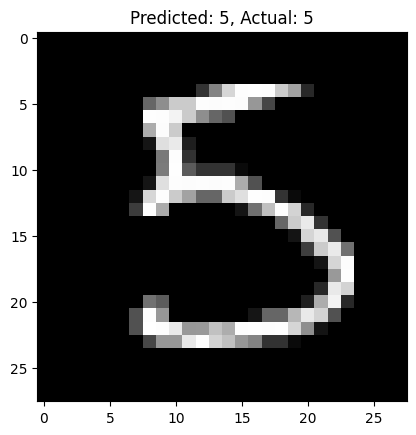

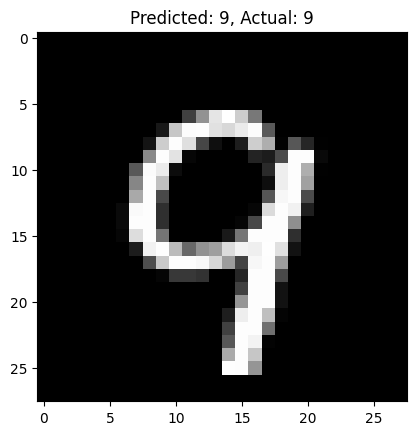

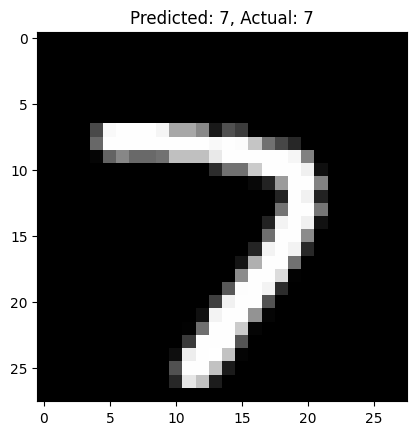

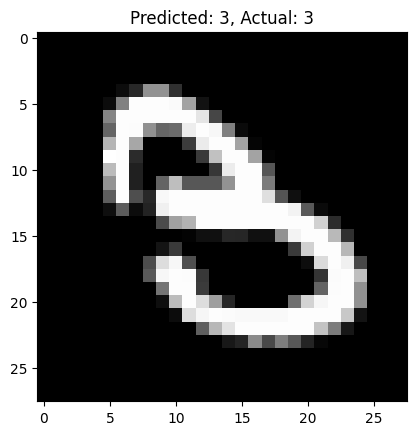

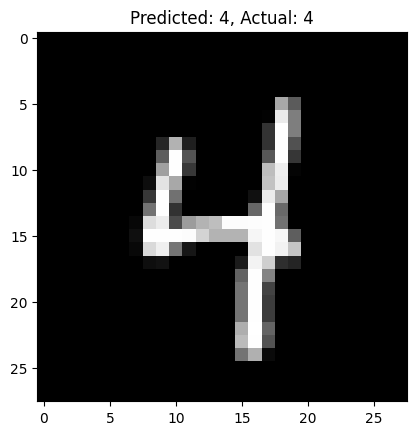

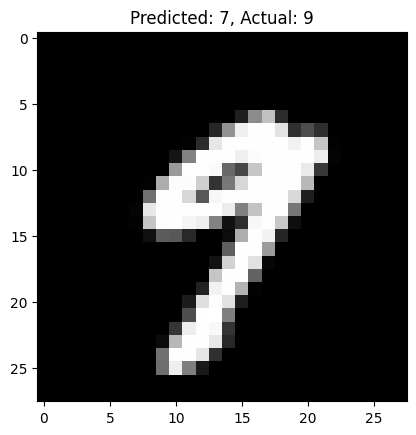

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Convertir x_test a un array de numpy
np_x_train = np.array(x_test)

# Verificar el tipo de x_train
print(type(x_train))

# Visualizar algunas predicciones
for i in range(20):
    # Mostrar la imagen de la predicción
    plt.imshow(np_x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()


En este bloque de código, se realizan predicciones con el modelo entrenado y se visualizan algunas de estas predicciones junto con las imágenes correspondientes.

1. **Realizar Predicciones:**
   - `predictions = model.predict(x_test)`: Genera predicciones para el conjunto de datos de prueba (`x_test`) utilizando el modelo entrenado. Las predicciones están en formato de probabilidad para cada clase.

2. **Convertir Datos a Numpy Array:**
   - `np_x_train = np.array(x_test)`: Convierte el conjunto de datos de prueba `x_test` a un array de Numpy.

3. **Verificar Tipo de Datos:**
   - `print(type(x_train))`: Imprime el tipo de `x_train` para verificar que sea un array de Numpy.

4. **Visualizar Algunas Predicciones:**
   - `for i in range(20)`: Itera sobre las primeras 20 muestras del conjunto de datos de prueba.
     - `plt.imshow(np_x_train[i].reshape(28, 28), cmap='gray')`: Muestra la imagen de la muestra actual con un mapa de color en escala de grises.
     - `plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")`: Establece el título del gráfico con la etiqueta predicha y la etiqueta real de la muestra.
     - `plt.show()`: Muestra el gráfico.

Este bloque de código ayuda a visualizar cómo el modelo está prediciendo las etiquetas para algunas imágenes del conjunto de prueba, permitiendo una comparación visual entre las predicciones y las etiquetas reales.


## Referencias

Barr, A. Feigenbaum, E. (1981).*The Handbook of Artificial Intelligence. Volume 1*. Elsevier Inc.

Mitchell, T. (1997). *Machine Learning*. McGraw Hill.


## Información de contacto

[💻 GitHub ](https://github.com/SevenDogsNTwoCats)

[💼 Linkedin](https://www.linkedin.com/in/alhanis-carolina-espinal-flores/)
